In [1]:
from treeVisuals import *

In [2]:
root = make(range(7))
visual(root)

------------------------
              0  
      1               2  
  3       4       5       6  
________________________


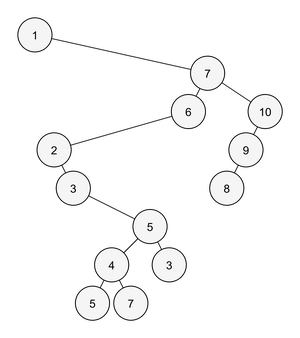

In [78]:
from PIL import ImageFont
from PIL import Image, ImageDraw, ImageFont
from collections import defaultdict, deque
from math import log2, ceil, log10

class DrawTree:
    def __init__(self, root, size=None):        
        self.root = root
        
        # width, height
        self.size = size
        self.bg_size = (6000, 6000)            
        self.node_size = (400, 400)
        self.font_size = 130
        self.line_width = 10
        self.startx = self.node_size[0]
        self.starty = self.node_size[1]
        
        self.clrs = {
                     'white': (245, 245, 245), 
                     'blue': (191, 213, 255), 
                     'green': (191, 255, 192), 
                     'red': (255, 191, 191), 
                     'cyan': (184, 255, 251),
                     'black': (20, 20, 20),
                    }
        self.bg_clr = (255, 255, 255, 50)
        self.node_clr = 'white'
        self.font_clr = 'black'
        self.outline_clr = 'black'
        self.max_chrs = 6
        
        self.left = self.bg_size[0]
        self.right = 0
        self.top = self.bg_size[1]
        self.bottom = 0
        
        self.nodemap = dict()
    
    def drawPoint(self, pos, clr='red'):
        self.draw.ellipse(tuple(map(int, (pos[0]-50, pos[1]-50, pos[0]+50, pos[1]+50))), fill=self.clrs[clr], outline=self.outline_clr)
        
    def drawNode(self, root, pos):
        if root is None: return 
        x1, y1 = pos[0] - self.node_size[0]/2, pos[1] - self.node_size[1]/2
        x2, y2 = pos[0] + self.node_size[0]/2, pos[1] + self.node_size[1]/2
        
        posf = ((pos[0] + x1)/2, (pos[1] + y1)/2)
#         self.draw.rectangle(tuple(map(int, (x1, y1, x2, y2))), fill=self.clrs[self.node_clr], outline=self.outline_clr, width=self.line_width)
        self.draw.ellipse(tuple(map(int, (x1, y1, x2, y2))), fill=self.clrs[self.node_clr], outline=self.outline_clr, width=self.line_width)
        self.drawFont(tuple(map(int, (x1, y1))), root.val)
#         self.drawPoint((x1, y1))
    
    def drawLine(self, point1, point2):
        self.draw.line(tuple(map(int, (*point1, *point2))), fill=self.clrs[self.outline_clr], width=self.line_width)
    
    def drawFont(self, pos, string):
        string = str(string)
        if len(string) > self.max_chrs: string = string[:4] + '..'
        font = ImageFont.truetype("arial", self.font_size)
        W, H = pos
        w, h = self.draw.textsize(string)
        w *= 12
        h *= 12
        a, b = self.node_size
#         self.drawPoint((W + (a-w)/2, H + (b-h)/2))
        self.draw.text(tuple(map(int, (W + (a-w)/2, H + (b-h)/2))), string, fill=self.font_clr, font=font)
    
    def drawTree(self, color='white'):
        self.node_clr = color if color in self.clrs else 'white'
        
        self.image = Image.new('RGBA', self.bg_size, self.bg_clr)
        self.draw = ImageDraw.Draw(self.image)
        
        self.setNodePos(self.root)
        self.drawEdges(self.root)
        self.drawNodes(self.root)
        
        area = (self.left-self.node_size[0], self.top - self.node_size[0], 
                self.right + self.node_size[0], self.bottom + self.node_size[0])
        self.image = self.image.crop(area)
        
        width, height = area[2] - area[0], area[3] - area[1]
        if self.size:
            factor = self.size[0]/width
            self.resize = (width * factor, height*factor)
        else:
            self.resize = (500, 300)
            
        self.resize = tuple(map(int, self.resize))
        self.image = self.image.resize(self.resize, resample=Image.ANTIALIAS)
        self.image.save('tree.png')
        return self.image
    
    def setNodePos(self, root):
        if root is None: return
        self.starty += self.node_size[1]*1.1
        self.setNodePos(root.left)
        
        self.nodemap[root] = (self.startx, self.starty, root)
        
        self.left = min(self.left, self.startx)
        self.right = max(self.right, self.startx)
        self.top = min(self.top, self.starty)
        self.bottom = max(self.bottom, self.starty)
        
        self.startx += self.node_size[1]*0.55
        
        self.setNodePos(root.right)
        self.starty -= self.node_size[1]*1.1
        
    def drawEdges(self, root, last=None):
        if root is None: return
        self.drawEdges(root.left, root)
        
        if last in self.nodemap:
            self.drawLine(self.nodemap[root][:-1], self.nodemap[last][:-1])
            
        self.drawEdges(root.right, root)
            
    
    def drawNodes(self, root):
        for node in self.nodemap:
            self.drawNode(self.nodemap[node][-1], self.nodemap[node][:-1])
    
    def getHeight(self, root):
        if root is None: return 0
        return 1 + max(self.getHeight(root.left), self.getHeight(root.right))
        
        
lis = "1 N 7 6 10 2 N 9 N N 3 8 N N 5 N N 4 3 5 7".split()
root = makeLevel(lis)
# root = make(range(7))
# visual(root)
DrawTree(root, (300, 300)).drawTree(root)

In [ ]:
root = make([5, 2, 3, 1, 4, 'N', 'N', 'N', 'N', 6, 8])

d = {root: 3}
print(d)
# DrawTree(root, (300, 300)).drawTree()

In [ ]:
# set background
from PIL import *
from PIL import ImageFont

size = (200, 200)
color = (180, 180, 180)
image = Image.new('RGBA', size, color)
image

In [ ]:
# draw elipse 
x1, y1, x2, y2 = 80, 80, 150, 150
coords = (x1, y1, x2, y2)
draw = ImageDraw.Draw(image)
draw.ellipse(coords, fill='yellow', outline='black')
image

In [ ]:
# draw line
point1, point2 = (20, 20), (115, 115)
draw.line((*point1, *point2), fill='white', width=3)
image

In [ ]:
print(list(range(127)))

In [ ]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(10, 6))
def getmid(a, b):
    return ((a[0]+b[0])/2, (a[1]+b[1])/2)

base = [(0, 0), (1, 0), (0.5, 0.5*(3**0.5))]
start = (0.5, 0.5)
for i in range(100000):
    a = random.randint(0, 2)
    start = getmid(start, base[a])
    base.append(start)
x, y = list(zip(*base))
plt.scatter(x, y, color='black', s=0.1)
plt.plot()

In [ ]:
import matplotlib.pyplot as plt
from treeVisuals import *

x, y = [], []

root = randomTree()
visual(root)
a = 0

def inorder(root, d=0):
    global a
    if not root: return 
    inorder(root.left, d-1)
    x.append(a)
    y.append(d)
    a+=1
    inorder(root.right, d-1)

inorder(root)

plt.scatter(x, y)
plt.show()

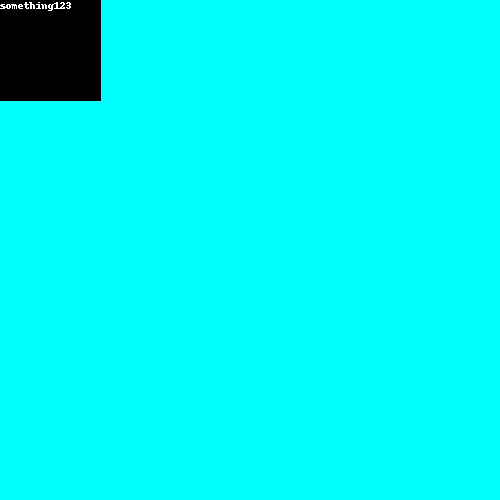

In [53]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

source_img = Image.new('RGBA', (500, 500), (0, 255, 255))

draw = ImageDraw.Draw(source_img)
draw.rectangle(((0, 0), (100, 100)), fill="black")
draw.text((0, 0), "something123")
source_img